# Import necessary libraries


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import plotly.express as px

# Load the dataset


In [39]:
df=pd.read_csv("/content/IRIS.csv")


# Display the head of the dataset

In [40]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Display basic information about the dataset


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Display summary statistics


In [42]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# Visualize the distribution of species


In [43]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [44]:
df["species"].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Axes: >

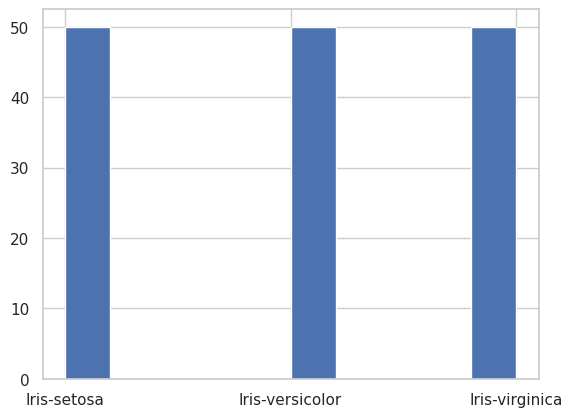

In [45]:
df["species"].hist()


# Scatter plots for sepal and petal measurements


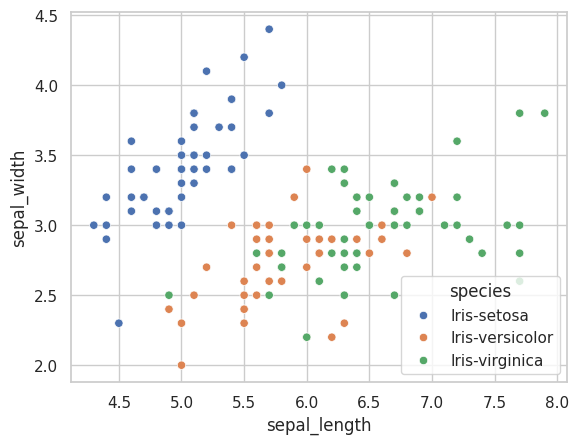

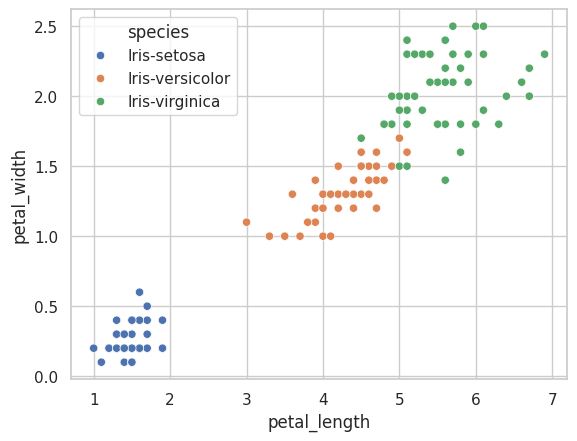

In [46]:
sns.set(style='whitegrid')
sns.scatterplot(df, x='sepal_length', y='sepal_width', hue='species')
plt.show()
sns.scatterplot(df, x='petal_length', y='petal_width', hue='species')
plt.show()

# Scatter plot using Plotly for sepal and petal measurements


In [47]:
fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species',
                 title='Scatter Plot of Sepal Length vs Sepal Width',
                 labels={'sepal_length': 'Sepal Length', 'sepal_width': 'Sepal Width'})

fig.show()


# Pairplot for detailed visualization


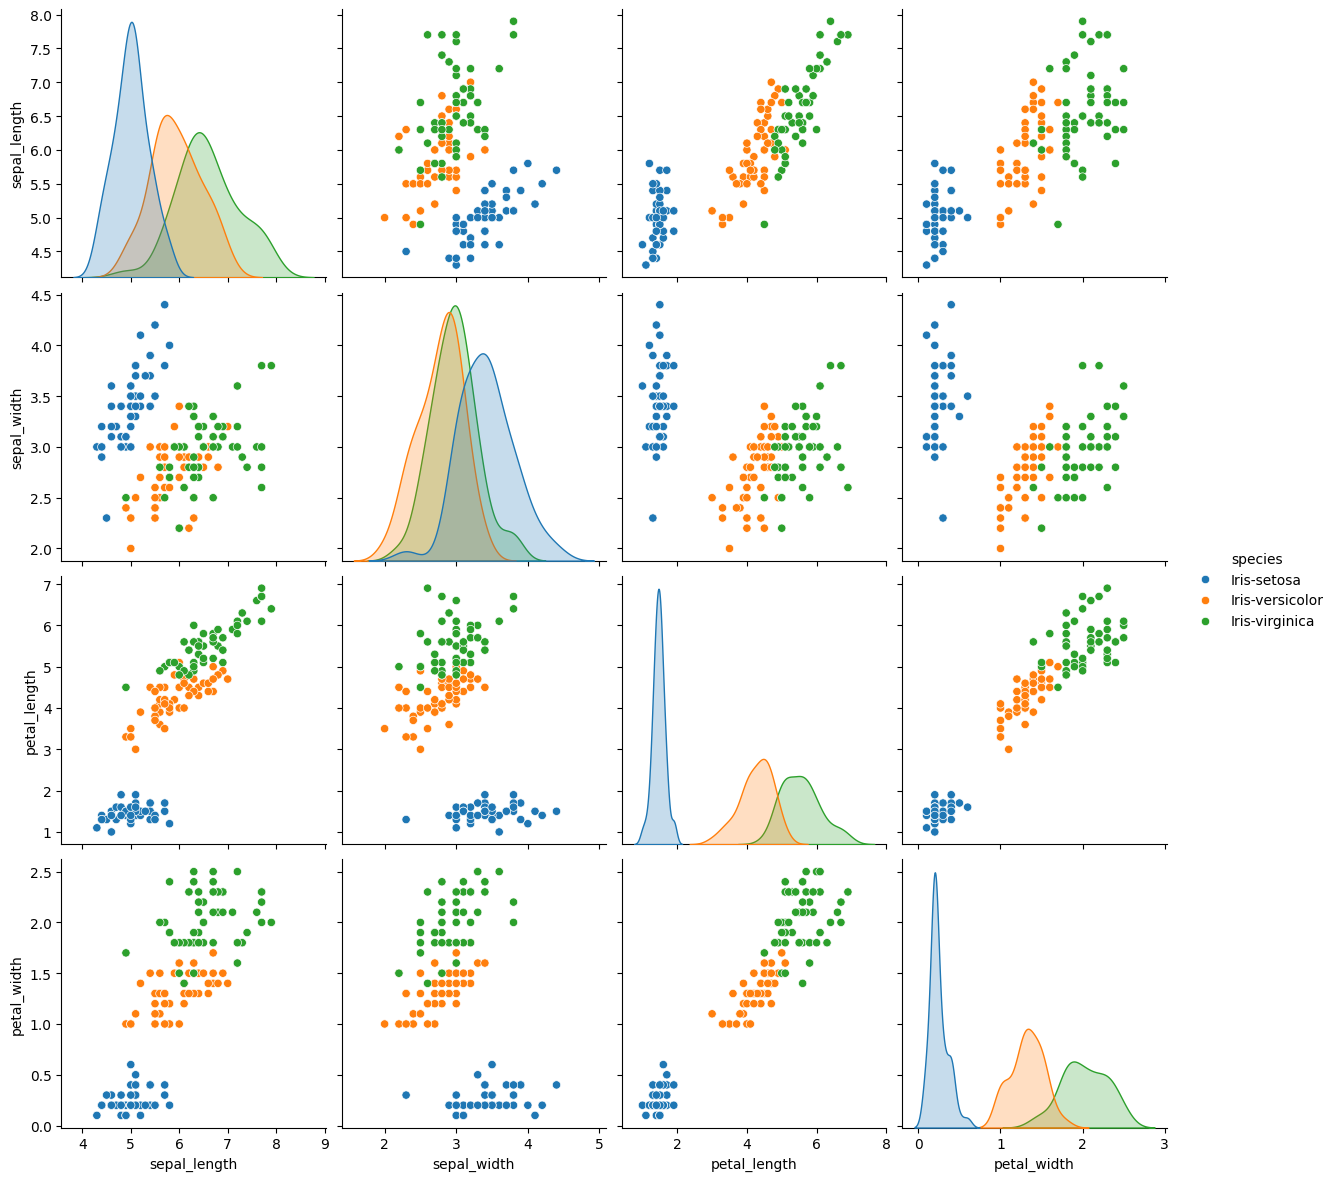

In [11]:
sns.pairplot(df, hue="species", height=3)
plt.show()

# Encode the target variable 'species'


In [14]:
le = LabelEncoder()
df['species']=le.fit_transform(df['species'])

# Correlation heatmap


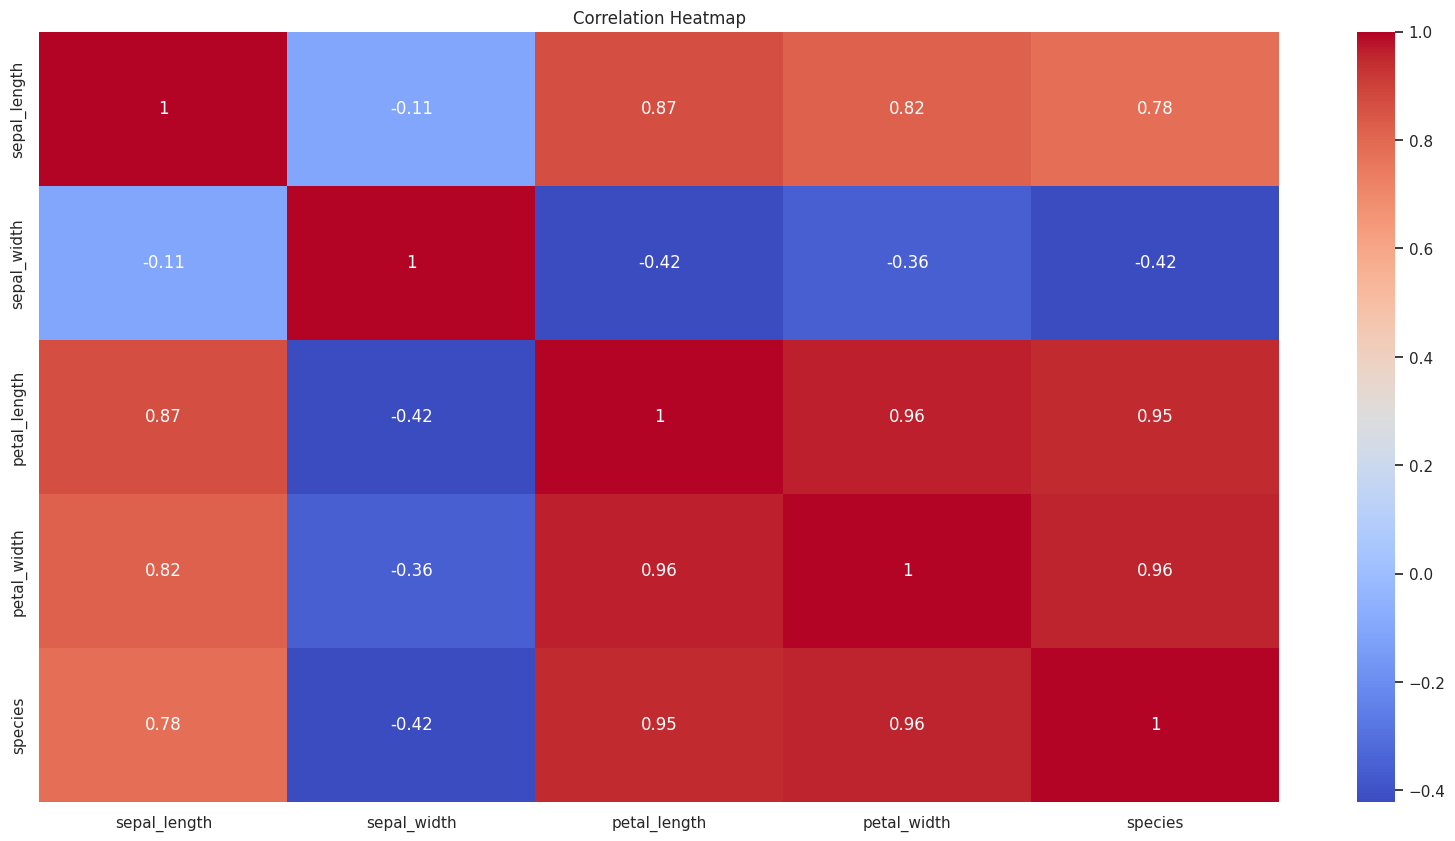

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Split the data into features (X) and target variable (y)


In [17]:
X=df.drop("species",axis=1)
y=df["species"]

# Feature scaling using Min-Max Scaling


In [18]:
Features=X.columns


In [19]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [20]:
X=pd.DataFrame(X,columns=Features)

In [21]:
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


# Split the data into training and testing sets


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [23]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((120, 4), (120,), (30, 4), (30,))

# Define and train a k-NN classifier


In [24]:
knn=KNeighborsClassifier(n_neighbors=15,algorithm="auto")
knn.fit(X_train,y_train)
print('KNNClassifierModel Train Score is : ' , knn.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

KNNClassifierModel Train Score is :  0.975
KNNClassifierModel Test Score is :  1.0
1.0


# Plot the Elbow Method for optimal k


In [25]:
def plot_elbow_method(X_train, X_test, title, color='blue'):
    acc = []
    err = []
    ks = list(range(1, 100, 2))

    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k,algorithm="auto")
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        error = np.mean(y_pred != y_test)
        err.append(error)
        acc.append(accuracy)

    plt.figure()
    plt.title(title)
    plt.xlabel("Number of Ks")
    plt.ylabel("Error")
    plt.plot(ks, err, color=color)


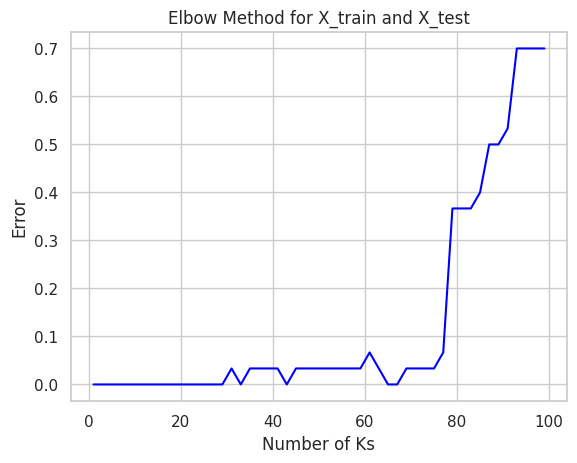

In [26]:
plot_elbow_method(X_train, X_test, "Elbow Method for X_train and X_test")


# Apply PCA for dimensionality reduction


In [27]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [28]:
X_train_pca.shape,y_train.shape,X_test_pca.shape,y_test.shape

((120, 2), (120,), (30, 2), (30,))

# Plot the Elbow Method for PCA-transformed data


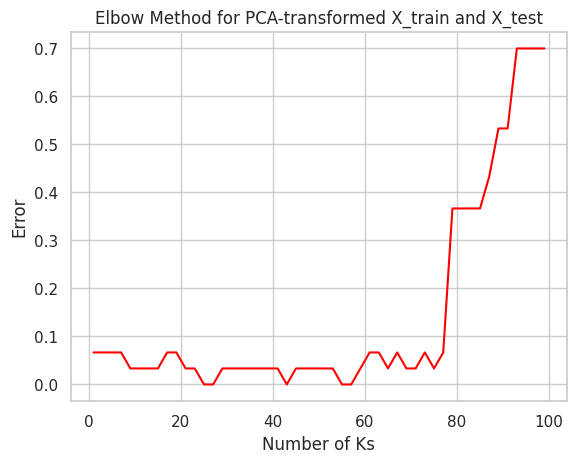

In [29]:
plot_elbow_method(X_train_pca, X_test_pca, "Elbow Method for PCA-transformed X_train and X_test", color='red')

# Train k-NN classifier on PCA-transformed data


In [30]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_pca,y_train)
print('KNNClassifierModel Train Score is : ' , knn.score(X_train_pca, y_train))
print('KNNClassifierModel Test Score is : ' , knn.score(X_test_pca, y_test))
y_pred = knn.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))

KNNClassifierModel Train Score is :  0.9583333333333334
KNNClassifierModel Test Score is :  0.9666666666666667
0.9666666666666667


# Define a custom k-NN classifier


In [31]:
from collections import Counter
from sklearn.neighbors import KDTree

class KNN:
    def __init__(self, n_neighbors=5, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.x_train = None
        self.y_train = None
        self.tree = None

    def fit(self, x_train, y_train):
        self.x_train = np.array(x_train)
        self.y_train = np.array(y_train)

        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.x_train)

    def predict(self, x_test):
        x_test = np.array(x_test)
        predictions = []

        for test_point in x_test:
            if self.algorithm == 'brute':
                distances = np.sqrt(np.sum((self.x_train - test_point)**2, axis=1))
                nearest_indices = distances.argsort()[:self.n_neighbors]
            elif self.algorithm == 'kd_tree':
                _, nearest_indices = self.tree.query([test_point], k=self.n_neighbors)

            nearest_labels = self.y_train[nearest_indices]
            most_common_label = Counter(nearest_labels).most_common(1)[0][0]
            predictions.append(most_common_label)

        return predictions

    def accuracy(self, x_test, y_test):
        predictions = self.predict(x_test)
        correct = sum(1 for pred, true in zip(predictions, y_test) if pred == true)
        return correct / len(y_test)

# Train and evaluate custom k-NN classifier


In [32]:
knn = KNN(n_neighbors=5, algorithm='brute')


knn.fit(X_train, y_train)


accuracy = knn.accuracy(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Plot accuracy and error for custom k-NN classifier


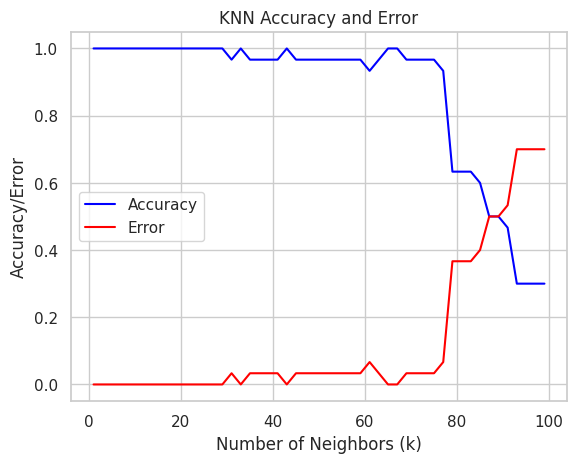

In [48]:
acc = []
err = []
ks = list(range(1, 100, 2))

for k in ks:
    knn = KNN(n_neighbors=k, algorithm='brute')
    knn.fit(X_train, y_train)
    accuracy = knn.accuracy(X_test, y_test)
    error = 1 - accuracy
    acc.append(accuracy)
    err.append(error)

plt.figure()
plt.title("KNN Accuracy and Error")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy/Error")
plt.plot(ks, acc, label='Accuracy', color='blue')
plt.plot(ks, err, label='Error', color='red')
plt.legend()
plt.show()

Line chart for KNN Accuracy and Error vs Number of Neighbors

In [55]:
# Create an interactive line chart using Plotly Express
fig = px.line(x=ks, y=[acc, err], labels={'x': 'Number of Neighbors (k)', 'y': 'Accuracy/Error'},
              title='KNN Accuracy and Error vs Number of Neighbors',
              line_shape='linear', line_dash_sequence=['solid', 'dash'],
              color_discrete_sequence=['blue', 'red'],
              markers=['circle', 'square'],)

# Add legend and show the plot
fig.update_layout(legend_title_text='', legend=dict(orientation="h", y=1.1, x=0.5))
fig.show()